In [1]:
import time

import numpy as np
from matplotlib import pyplot as plt, cm
import numpy.typing as npt

from semester6.optimize import (
    minimize_gradient,
    minimize_heavy_ball,
    minimize_nesterov,
    minimize_newton,
)

In [2]:
def answer(
    f: callable,
    x0: npt.NDArray[float],
    alpha: float,
    beta: float,
    eps: float,
    a: float,
    b: float,
    elev=60,
    azim=90,
):
    m_g = minimize_gradient(f, x0, alpha, eps)
    m_b = minimize_heavy_ball(f, x0, alpha, beta, eps)
    m_n = minimize_nesterov(f, x0, alpha, beta, eps)
    m_nw = minimize_newton(f, x0, eps)

    print("Точка минимума для градиентного спуска:", m_g[0])
    print("Количество итераций:", m_g[2])

    print("Точка минимума для тяжелого шарика:", m_b[0])
    print("Количество итераций:", m_b[2])

    print("Точка минимума для метода Нестерова:", m_n[0])
    print("Количество итераций:", m_n[2])

    print("Точка минимума для метода Ньютона:", m_nw[0])
    print("Количество итераций:", m_nw[2])

    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")

    # Surface
    xy = np.mgrid[a:b:50j, a:b:50j]
    fz = f(xy)
    surf = ax.plot_surface(xy[0], xy[1], fz, cmap=cm.viridis, alpha=0.5)

    # Gradient descend
    grad_xs = np.zeros(len(m_g[1]))
    grad_ys = np.zeros(len(m_g[1]))
    grad_zs = np.zeros(len(m_g[1]))
    for i, point in enumerate(m_g[1]):
        grad_xs[i] = point[0]
        grad_ys[i] = point[1]
        grad_zs[i] = f(point)

    (grad,) = ax.plot(grad_xs, grad_ys, grad_zs, label="Gradient")

    # Heavy ball
    ball_xs = np.zeros(len(m_b[1]))
    ball_ys = np.zeros(len(m_b[1]))
    ball_zs = np.zeros(len(m_b[1]))
    for i, point in enumerate(m_b[1]):
        ball_xs[i] = point[0]
        ball_ys[i] = point[1]
        ball_zs[i] = f(point)

    (ball,) = ax.plot(ball_xs, ball_ys, ball_zs, label="Heavy ball")

    # Nesterov
    nesterov_xs = np.zeros(len(m_n[1]))
    nesterov_ys = np.zeros(len(m_n[1]))
    nesterov_zs = np.zeros(len(m_n[1]))
    for i, point in enumerate(m_n[1]):
        nesterov_xs[i] = point[0]
        nesterov_ys[i] = point[1]
        nesterov_zs[i] = f(point)

    (nesterov,) = ax.plot(nesterov_xs, nesterov_ys, nesterov_zs, label="Nesterov")

    # Newton
    newton_xs = np.zeros(len(m_nw[1]))
    newton_ys = np.zeros(len(m_nw[1]))
    newton_zs = np.zeros(len(m_nw[1]))
    for i, point in enumerate(m_nw[1]):
        newton_xs[i] = point[0]
        newton_ys[i] = point[1]
        newton_zs[i] = f(point)

    (newton,) = ax.plot(newton_xs, newton_ys, newton_zs, label="Newton")

    fig.legend(handles=[grad, ball, nesterov, newton])
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.view_init(elev=elev, azim=azim, roll=0)
    plt.show()

Точка минимума для градиентного спуска: [ 0.00000000000000003 -0.                 ]
Количество итераций: 42
Точка минимума для тяжелого шарика: [-0.  0.]
Количество итераций: 32
Точка минимума для метода Нестерова: [ 0.00000000000000003 -0.                 ]
Количество итераций: 33
Точка минимума для метода Ньютона: [-0. -0.]
Количество итераций: 2


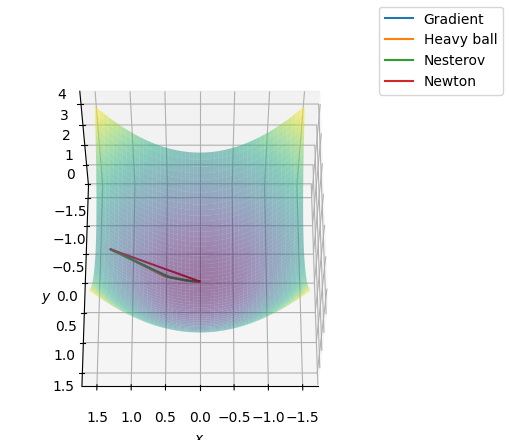

In [5]:
f1 = lambda x: x[0] ** 2 + x[1] ** 2
np.set_printoptions(precision=17, suppress=True)
answer(f1, np.array([1.3, -1 / 42]), 0.3, 0.1, 10e-17, -1.5, 1.5)

Точка минимума для градиентного спуска: [1.999999999997 0.999999999999]
Количество итераций: 54
Точка минимума для тяжелого шарика: [1.999999999993 0.999999999993]
Количество итераций: 48
Точка минимума для метода Нестерова: [1.999999999998 1.000000000002]
Количество итераций: 62
Точка минимума для метода Ньютона: [2. 1.]
Количество итераций: 1


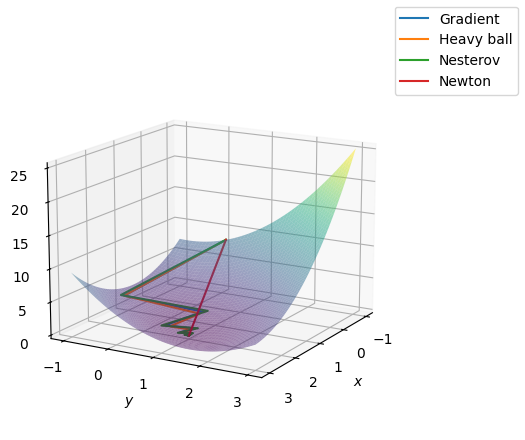

In [4]:
f2 = lambda x: ((x[0] - 2) + (x[1] - 1)) ** 2 / 4 + ((x[0] - 2) - (x[1] - 1)) ** 2
np.set_printoptions(precision=12, suppress=True)
answer(f2, np.array([-1, 0.1]), 0.4, 0.031, 10e-12, -1, 3, elev=15, azim=30)
# with alpha 0.5 breaks

Точка минимума для градиентного спуска: [0.4999999999999997 1.                ]
Количество итераций: 11
Точка минимума для тяжелого шарика: [0.4999999999999993 1.                ]
Количество итераций: 52
Точка минимума для метода Нестерова: [0.4999999999999995 1.                ]
Количество итераций: 15
Точка минимума для метода Ньютона: [-0.5  1. ]
Количество итераций: 4


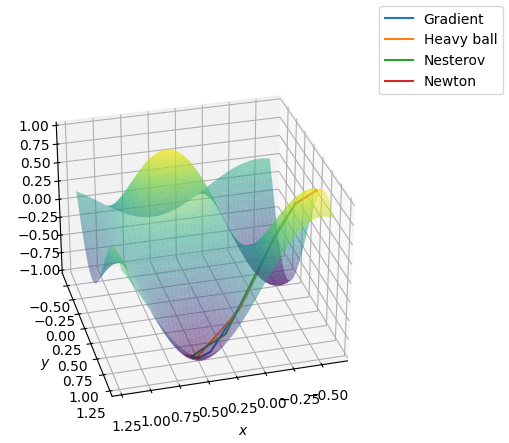

In [7]:
f3 = lambda x: np.sin(np.pi * x[0]) * np.cos(np.pi * x[1])
np.set_printoptions(precision=17, suppress=True)
answer(f3, np.array([-1 / 3, 1]), 0.1, 0.3, 10e-17, -0.6, 1.2, elev=30, azim=75)

Точка минимума для градиентного спуска: [-1.570796326784908    0.00000000000530026]
Количество итераций: 159
Точка минимума для тяжелого шарика: [-1.5707963267962841  -0.00000000000653685]
Количество итераций: 219
Точка минимума для метода Нестерова: [-1.5707963267937877  -0.00000000000336246]
Количество итераций: 128
Точка минимума для метода Ньютона: [-3.1415926535950267 -1.57079632680013  ]
Количество итераций: 5


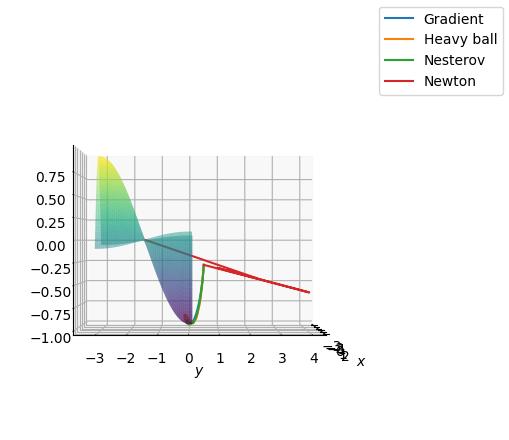

In [8]:
f4 = lambda x: np.sin(x[0]) * np.cos(x[1])
answer(f4, np.array([-1 / 3, 1 / 2]), 0.15, 0.8, 10e-12, -3.2, 0.1, elev=0, azim=0)
# Жуткая жуть, Ньютон перескочил

Точка минимума для градиентного спуска: [-0.5000000000008572   0.00000000000033809]
Количество итераций: 36
Точка минимума для тяжелого шарика: [-0.500000000000561   -0.00000000000040059]
Количество итераций: 33
Точка минимума для метода Нестерова: [-0.49999999999916633 -0.00000000000010928]
Количество итераций: 77
Точка минимума для метода Ньютона: [ 0.  -0.5]
Количество итераций: 5


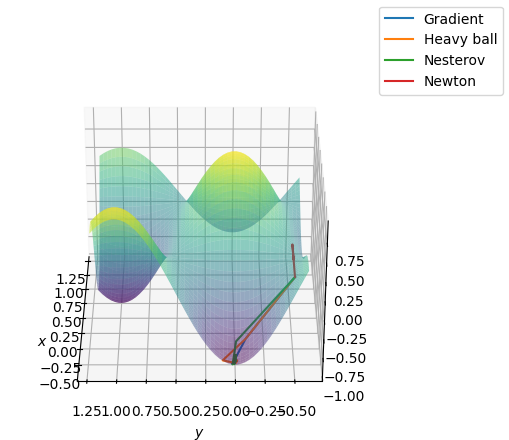

In [10]:
answer(f3, np.array([-1 / 3, -1 / 2]), 0.15, 0.2, 10e-12, -0.6, 1.2, elev=30, azim=180)
# КАК?!

Точка минимума для градиентного спуска: [1.9999999999903295 0.9999999999903295]
Количество итераций: 246
Точка минимума для тяжелого шарика: [1.9999999999902123 0.9999999999902123]
Количество итераций: 151
Точка минимума для метода Нестерова: [1.9999999999901137 0.9999999999901138]
Количество итераций: 161
Точка минимума для метода Ньютона: [1.9999999999999862 0.9999999999999892]
Количество итераций: 1


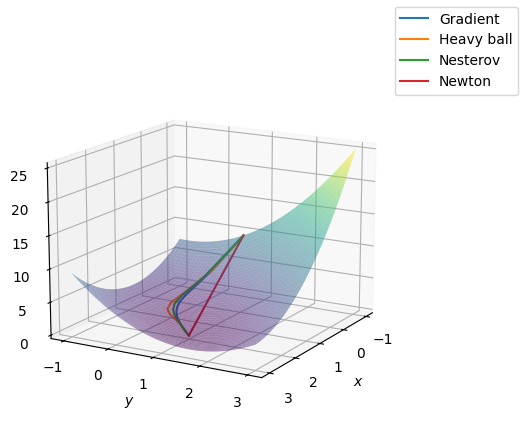

In [8]:
answer(f2, np.array([-1, 0.51]), 0.1, 0.31, 10e-12, -1, 3, elev=15, azim=30)